<a href="https://colab.research.google.com/github/singhk100/Classification/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Business Problem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel("/content/investment.csv.xlsx")
df

,year,per capita income (US$)
0,1968,2942.652340
1,1969,3021.245520
2,1970,3399.299037
3,1971,3768.297935
4,1972,4251.175484
5,1973,4804.463248
6,1974,5576.514583
7,1975,5998.144346
8,1976,7062.131392
9,1977,7100.126170


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     51 non-null     int64  
 1   per capita income (US$)  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 944.0 bytes


In [11]:
df.describe()

,year,per capita income (US$)
count,51.000000,51.000000
mean,1993.000000,18959.588019
std,14.866069,12460.054572
min,1968.000000,2942.652340
25%,1980.500000,8895.179386
50%,1993.000000,16426.725480
75%,2005.500000,30968.159295
max,2018.000000,42676.468370


In [17]:
df2=df.rename(columns={'per capita income (US$)':'per_capita_income'},inplace=False)
df2.describe()

,year,per_capita_income
count,51.000000,51.000000
mean,1993.000000,18959.588019
std,14.866069,12460.054572
min,1968.000000,2942.652340
25%,1980.500000,8895.179386
50%,1993.000000,16426.725480
75%,2005.500000,30968.159295
max,2018.000000,42676.468370


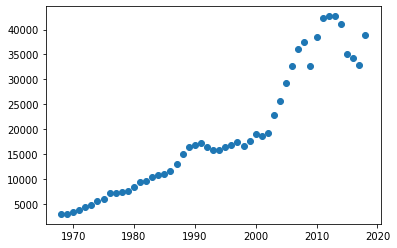

In [19]:
plt.scatter(x =df2.year, y = df2.per_capita_income)
plt.show()

In [ ]:
#data preparation for ML algo

In [20]:
df2.isnull().sum()

year                 0
per_capita_income    0
dtype: int64

In [21]:
df2.mean()

year                  1993.000000
per_capita_income    18959.588019
dtype: float64

In [ ]:
# training & Testing (80% , 20%)

In [22]:
X = df2.drop("year",axis = "columns")
y = df2.drop("per_capita_income", axis = "columns")
print(X.shape)
print(y.shape)

(51, 1)
(51, 1)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 1)
(40, 1)
(11, 1)
(11, 1)


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.score(X_test,y_test)

0.8134110823618721

In [27]:
import joblib
joblib.dump(lr, "per_capita_income.pkl")

['per_capita_income.pkl']

In [36]:
perc_model = joblib.load("per_capita_income.pkl")